In [1]:
import openai
import os
openai.api_key = os.getenv("OPENAI_API_KEY")

In [57]:
# write a prompt for chatgpt to generate robot commands from a human command

prompt = """
Provide a sequence of steps a robot would need to take to complete the task. 
The robot does not have any prior knowledge of the task. 
The robot can only perform the following actions: move forward, move backward, turn left, turn right, pick up an object, and put down an object.
The robot has a camera that can see the objects in its immediate vicinity.
The robot has four legs and an arm. 
The robot can only see the objects in its immediate vicinity.
Human: Kick a soccer ball.
Steps:
1. Locate the ball
2. Move to the ball
3. Position the foot next to the ball
4. Swing the leg back
5. Swing the leg forward to hit the ball

Human: Turn on the lights
"""
res = openai.Completion.create(
    model="text-davinci-003",
    prompt=prompt,
    n=5,
    temperature=1,
    max_tokens=200
)

In [58]:
for c in res.choices:
    print(c.text)
res.choices

Steps:
1. Scan the room to locate the light switch
2. Move to the light switch
3. Position the arm next to the light switch
4. Flip the switch to turn on the light
Steps:
1. Locate the light switch
2. Move to the light switch
3. Position the arm next to the light switch
4. Turn the light switch on with the arm
Steps: 
1. Locate and identify the light switch 
2. Position the arm next to the switch 
3. Extend the arm 
4. Push down the switch
Steps:
1. Locate the light switch
2. Position the arm next to it
3. Move the arm to flip the switch
4. Verify that the lights have switched on

Steps:
1. Locate the switch
2. Move towards it
3. Use arm to reach the switch
4. Push down to turn on the lights


[<OpenAIObject at 0x7fab2a0527f0> JSON: {
   "finish_reason": "stop",
   "index": 0,
   "logprobs": null,
   "text": "Steps:\n1. Scan the room to locate the light switch\n2. Move to the light switch\n3. Position the arm next to the light switch\n4. Flip the switch to turn on the light"
 },
 <OpenAIObject at 0x7fab2a4622f0> JSON: {
   "finish_reason": "stop",
   "index": 1,
   "logprobs": null,
   "text": "Steps:\n1. Locate the light switch\n2. Move to the light switch\n3. Position the arm next to the light switch\n4. Turn the light switch on with the arm"
 },
 <OpenAIObject at 0x7fab2a462070> JSON: {
   "finish_reason": "stop",
   "index": 2,
   "logprobs": null,
   "text": "Steps: \n1. Locate and identify the light switch \n2. Position the arm next to the switch \n3. Extend the arm \n4. Push down the switch"
 },
 <OpenAIObject at 0x7fab2a460220> JSON: {
   "finish_reason": "stop",
   "index": 3,
   "logprobs": null,
   "text": "Steps:\n1. Locate the light switch\n2. Position the arm n

In [48]:
nums = [int(c.text.split("\n")[-1]) for c in res.choices]

In [49]:
nums

[8,
 7,
 5,
 7,
 7,
 7,
 6,
 2,
 3,
 7,
 5,
 5,
 8,
 8,
 7,
 3,
 7,
 3,
 6,
 7,
 7,
 7,
 6,
 6,
 3,
 2,
 5,
 5,
 6,
 6,
 3,
 5,
 6,
 5,
 7,
 5,
 7,
 5,
 7,
 7,
 3,
 2,
 7,
 5,
 4,
 2,
 2,
 6,
 7,
 3,
 7,
 7,
 3,
 7,
 7,
 5,
 5,
 4,
 4,
 7,
 6,
 8,
 7,
 5,
 3,
 4,
 4,
 5,
 7,
 6,
 7,
 8,
 7,
 7,
 3,
 4,
 6,
 7,
 5,
 7,
 4,
 7,
 3,
 5,
 6,
 6,
 9,
 7,
 9,
 3,
 3,
 7,
 3,
 8,
 3,
 9,
 7,
 4,
 6,
 8,
 8,
 5,
 6,
 7,
 7,
 3,
 7,
 4,
 5,
 5,
 7,
 3,
 7,
 6,
 6,
 4,
 7,
 5,
 5,
 7,
 7,
 7,
 3,
 5,
 7,
 8,
 3,
 3]

(array([ 5., 20., 10.,  0., 22., 17.,  0., 42.,  9.,  3.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

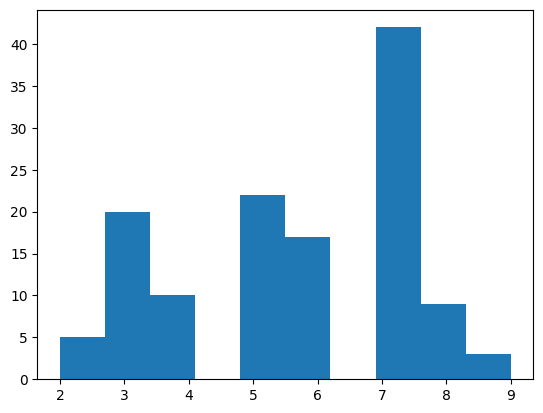

In [50]:
import matplotlib.pyplot as plt
plt.hist(nums, bins=10)